In [1]:
# Here I will resize the VinDR dataset images that has passed the filtering.
# Plus TODO: normalize the images [0, 1] for the training of StyleGAN2.

Original Dimensions :  (2421, 941, 3)
Resized Dimensions :  (512, 199, 3)
Original Dimensions of Resized image :  (512, 199, 3)
Resized Dimensions :  (512, 512, 3)


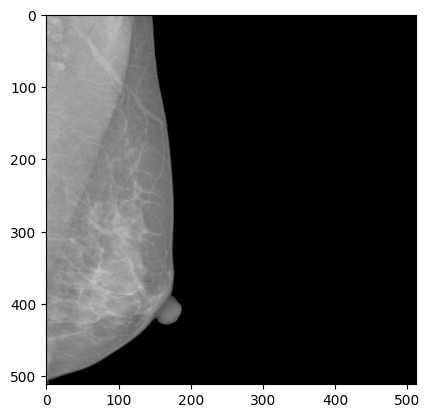

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


def resize_mammograms(img, goal_size):
    """This function is resizing the images with respect to the aspect ratio of the images.
        Due to the previous preprocessing most of the mammograms have higher height than width.
        For this reason given the image and a goal size this function returns a image with one
        side of the image being resized by 512. Then we use the padding function to expand the image
        to a square so that it can be trained.

    Args:
        img (str): Path to the image
        goal_size (int): Size of the resizing preferably a power of 2.

    Returns:
        numpy array: a numpy array with one dimension of size goal size.
    """
    img = cv2.imread(img, cv2.IMREAD_UNCHANGED)
 

    # Get the current dimensions of the image
    print('Original Dimensions : ',img.shape)
    height, width = img.shape[:2]
    
    if height > width:
        # Set the new dimensions with respect to the aspect ratio of the height.
        new_height = goal_size
        new_width = int(width * new_height / height)
    elif height < width:
        # Set the new dimensions with respect to the aspect ratio of the width.
        new_height = goal_size
        new_width = int(width * new_height / height)
    elif height == width:
        # Set the new dimensions of a square.
        new_height = goal_size
        new_width = goal_size
    else:
        raise("Something spooky with the dimensions of the image: " + img)
    
    dim = (new_width, new_height)


    # Resize the image
    resized = cv2.resize(img, (dim))

    print('Resized Dimensions : ',resized.shape)

    return resized

def add_padding(resized_image, goal_dimension):
    """Give the resized images this function adds a padding to expand in to square size.

    Args:
        resized_image (3d numpy array): A numpy image.
        goal_dimension (int): size of square image to pad.

    Returns:
        square sized image: A numpy array.
    """
    # Get the current dimensions of the image
    print('Original Dimensions of Resized image : ' ,resized_image.shape)
    new_height, new_width = resized_image.shape[:2]

    if new_height == goal_dimension:
        
        # Pad the image to make it 512x512
        pad_width = goal_dimension - new_width
        left_pad = int(pad_width / 2)
        right_pad = pad_width
        padded_img = np.pad(resized_image, ((0, 0), (0, pad_width), (0, 0)), mode='constant', constant_values=0)

        print('Resized Dimensions : ' ,padded_img.shape)

    elif new_width == goal_dimension:
        
        # Pad the image to make it 512x512
        pad_height = goal_dimension - new_height
        left_pad = pad_height
        padded_img = np.pad(resized_image, ((0, 0), (pad_height, 0), (0, 0)), mode='constant', constant_values=0)

        print('Resized Dimensions : ' ,padded_img.shape)


    else:
        raise("Something spooky with the dimensions of the image: " ,resized_image)
    
    return padded_img

def get_square_mammogram(image, square_dimension):
    """Using the two previous function to resize and add padding to the image.

    Args:
        img (str): Path to the image
        goal_size (int): Size of the resizing preferably a power of 2.

    Returns:
        paddedImage: square image.
    """
    resizedMammo = resize_mammograms(image, square_dimension)
    paddedImage = add_padding(resizedMammo, square_dimension)

    return paddedImage 


padded_img = get_square_mammogram('/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/139179b3572bf8dc5376c771bea8e7a9.png', 512)
#Show the image with matplotlib
plt.imshow(padded_img)
plt.show()


In [ ]:
# TODO: Make of MLO's into 512x512.
#       Normalize them.
#       Save them to the same location.

import os
from skimage import img_as_ubyte

DIR = "path/to/directory"
writeDIR = "path/to/write"
DIMENSION = 512
total = len(os.listdir(DIR))

for index, filename in enumerate(os.listdir(DIR)):
    
    count_deleted = 0
    # Open the image file
    image_path = os.path.join(DIR, filename)
    goal_path = os.path.join(writeDIR, filename)
    # Print the image path.
    print(image_path)


    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    #new_height, new_width = img.shape[:2]

    if img is None:
        count_deleted += 1
        os.remove(image_path)
    else:
        # elif (img.shape[:2] != (512,512)):
        # Make the image a square with a fair padding to the right.
        padimg = get_square_mammogram(image_path, 512)

        # Since we have 8-bit images with ranges of intensity [0, 255], 
        # dividing with 255 will do the trick to normalize the mammograms on [0, 1]. 
        # Necessary for the training of the gans.
        normalized_image = padimg/255
        #normalized_image = cv2.normalize(padimg, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        # Using cv2.imwrite() method
        # Saving the image
        normalized_image = img_as_ubyte(normalized_image)
        cv2.imwrite(goal_path, normalized_image)

    #Show the image with matplotlib
    #plt.imshow(normalized_image)
    #plt.show()
    #print(padimg/255)

    print("Processed " + str(index) + " out of " + str(total))

print("Deleted .. " + str(count_deleted))